In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import os

In [2]:
def load_obj(name, path):
    with open(path+ name, 'rb') as f:
        return pickle.load(f)

In [3]:
path_data = "/sps/crnl/ademasson/data/GNN/"
suffix = "cvresults.csv"
balanced_suffix = 'balanced_test'

In [4]:
files = {}
balanced_files = {}
for file in os.listdir(path_data):
    if file.endswith(suffix):
        name = file[:-len(suffix)-1]
        if name.endswith(balanced_suffix):
            name = file[:-(len(suffix)+len(balanced_suffix)+2)]
            balanced_files[name] = file
        else:
            files[name] = file
print(files)
print(balanced_files)

{'ChebConv_gc_80%': 'ChebConv_gc_80%_cvresults.csv', 'ChebConv_dist_matrix_90%': 'ChebConv_dist_matrix_90%_cvresults.csv', 'ChebConv_gc_90%': 'ChebConv_gc_90%_cvresults.csv', 'ChebConv_corr_80%': 'ChebConv_corr_80%_cvresults.csv', 'ChebConv_gc_all': 'ChebConv_gc_all_cvresults.csv', 'ChebConv_corr_90%': 'ChebConv_corr_90%_cvresults.csv', 'ChebConv_dist_matrix_80%': 'ChebConv_dist_matrix_80%_cvresults.csv', 'ChebConv_corr_all': 'ChebConv_corr_all_cvresults.csv', 'ChebConv_dist_matrix_all': 'ChebConv_dist_matrix_all_cvresults.csv', 'ChebConv_no_weight': 'ChebConv_no_weight_cvresults.csv'}
{'ChebConv_gc_90%': 'ChebConv_gc_90%_balanced_test_cvresults.csv', 'ChebConv_corr_80%': 'ChebConv_corr_80%_balanced_test_cvresults.csv', 'ChebConv_gc_all': 'ChebConv_gc_all_balanced_test_cvresults.csv', 'ChebConv_no_weight': 'ChebConv_no_weight_balanced_test_cvresults.csv', 'ChebConv_corr_all': 'ChebConv_corr_all_balanced_test_cvresults.csv', 'ChebConv_corr_90%': 'ChebConv_corr_90%_balanced_test_cvresult

In [5]:
# Unbalanced

In [6]:
unbalanced_df = pd.DataFrame(columns=['model','fold', 'accuracy', 'f1-score', 'specificity', 'sensitivity', 'confusion matrix'])
for model, file in files.items():
    df = pd.read_csv(path_data+file)
    df['model'] = model 
    unbalanced_df = pd.concat([unbalanced_df, df], axis=0)

In [7]:
unbalanced_df

,model,fold,accuracy,f1-score,specificity,sensitivity,confusion matrix
0,ChebConv_gc_80%,1,0.832295,0.055556,0.856720,0.143939,[3187 533 113 19]
1,ChebConv_gc_80%,2,0.582035,0.099553,0.584737,0.523529,[2153 1529 81 89]
2,ChebConv_gc_80%,3,0.981049,0.026667,0.989783,0.028571,[3778 39 34 1]
3,ChebConv_gc_80%,4,0.858255,0.061856,0.891782,0.109091,[3288 399 147 18]
4,ChebConv_gc_80%,5,0.641745,0.025424,0.646640,0.315789,[2454 1341 39 18]
...,...,...,...,...,...,...,...
6,ChebConv_no_weight,7,0.583333,0.017146,0.584402,0.451613,[2233 1588 17 14]
7,ChebConv_no_weight,8,0.786345,0.007238,0.787816,0.272727,[3026 815 8 3]
8,ChebConv_no_weight,9,0.827362,0.011887,0.829771,0.250000,[3183 653 12 4]
9,ChebConv_no_weight,10,0.643043,0.043145,0.645723,0.484375,[2446 1342 33 31]


In [8]:
models = unbalanced_df['model'].unique()
folds = unbalanced_df['fold'].unique()
bar_width = 0.08
bar_positions = np.arange(len(folds))

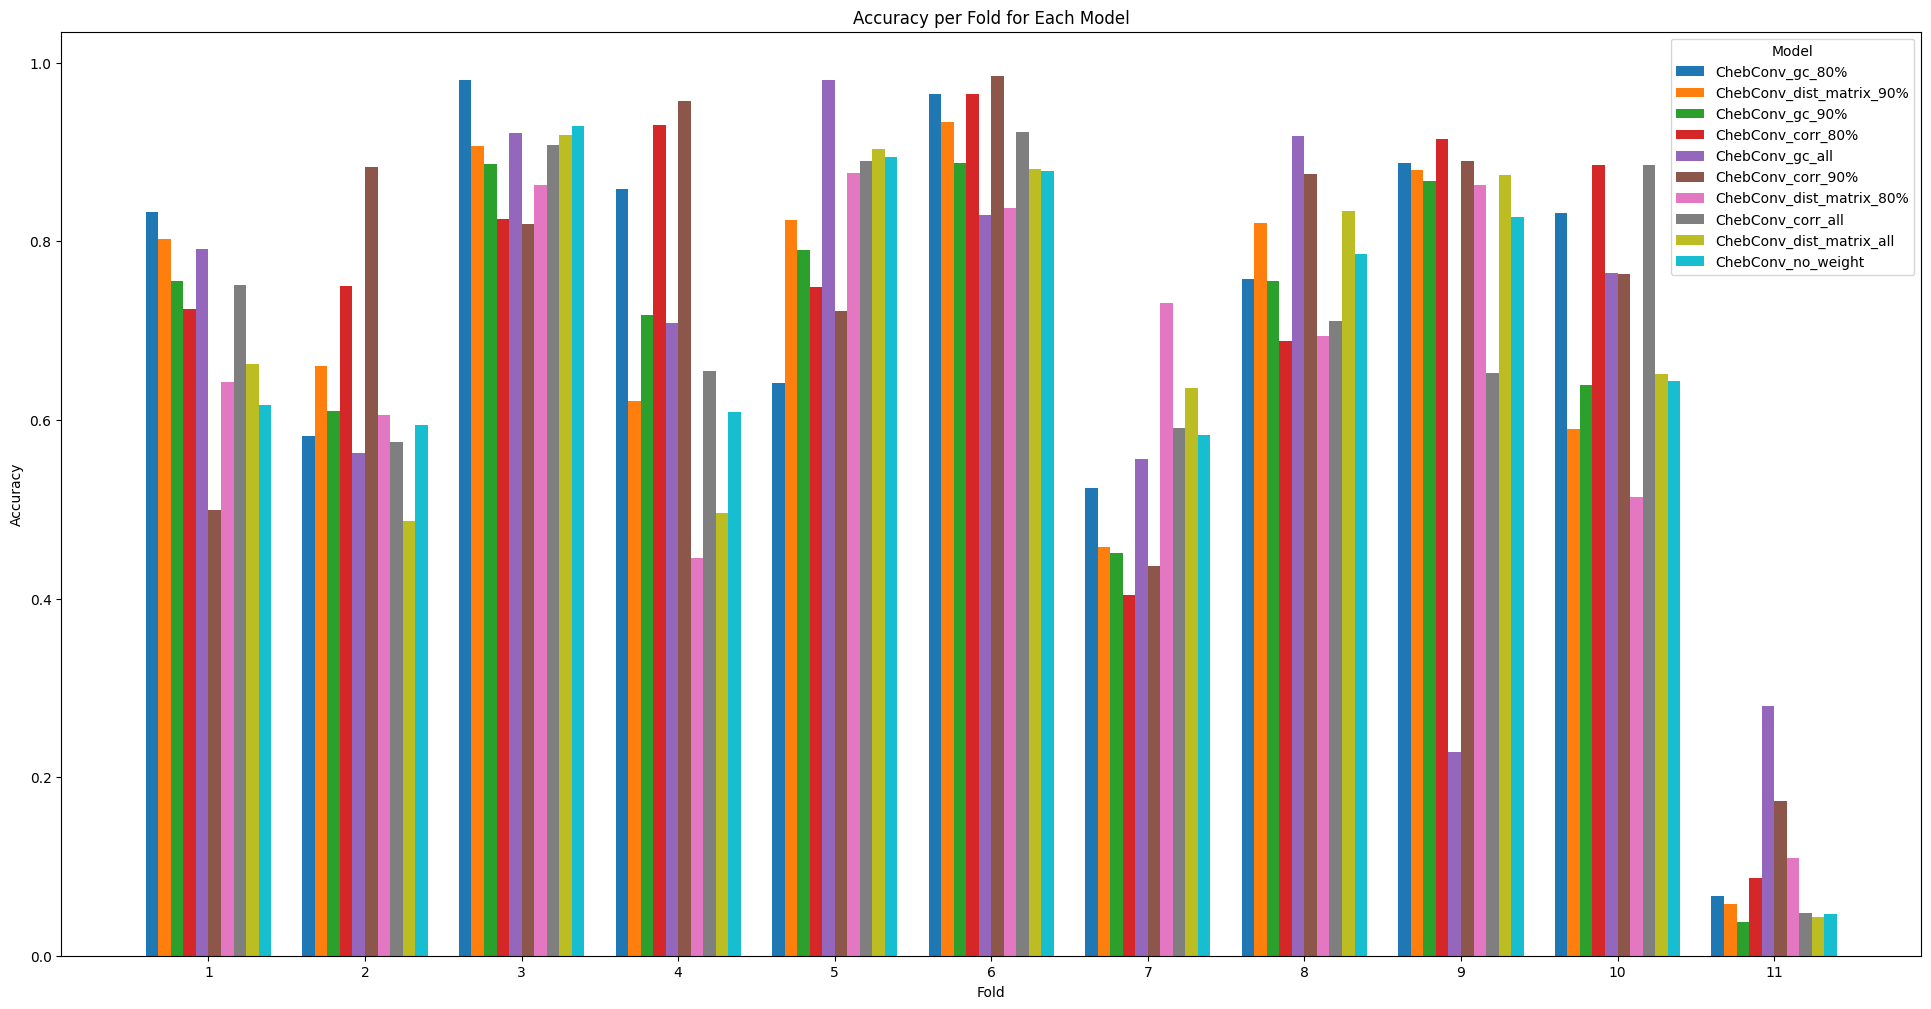

In [9]:
plt.figure(figsize=(24, 12))

for i, model in enumerate(models):
    model_data = unbalanced_df[unbalanced_df['model'] == model]
    plt.bar(bar_positions + i * bar_width, model_data['accuracy'], bar_width, label=model)

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy per Fold for Each Model')
plt.xticks(bar_positions + bar_width * (len(models) - 1) / 2, folds)
plt.legend(title='Model')
plt.savefig(path_data+'accuracy_per_fold_ChebConv_models.png')

<Figure size 2400x1200 with 0 Axes>

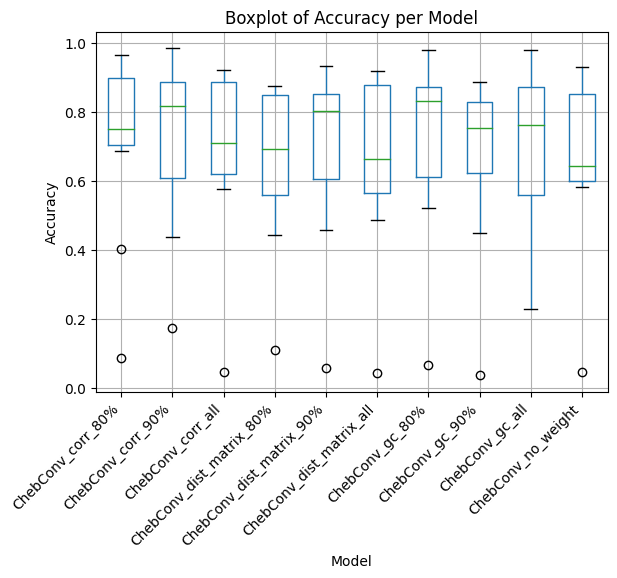

In [10]:
plt.figure(figsize=(24, 12))
unbalanced_df.boxplot(column='accuracy', by='model')
plt.title('Boxplot of Accuracy per Model')
plt.suptitle('')  # Supprime le titre automatique de Pandas
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.savefig(path_data+'accuracy_boxplot_ChebConv_models.png')

In [ ]:
plt.figure(figsize=(24, 12))

for i, model in enumerate(models):
    model_data = unbalanced_df[unbalanced_df['model'] == model]
    plt.bar(bar_positions + i * bar_width, model_data['f1-score'], bar_width, label=model)

plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.title('f1 score per Fold for Each Model')
plt.xticks(bar_positions + bar_width * (len(models) - 1) / 2, folds)
plt.legend(title='Model')
plt.savefig(path_data+'f1_score_per_fold_ChebConv_models.png')

<Figure size 2400x1200 with 0 Axes>

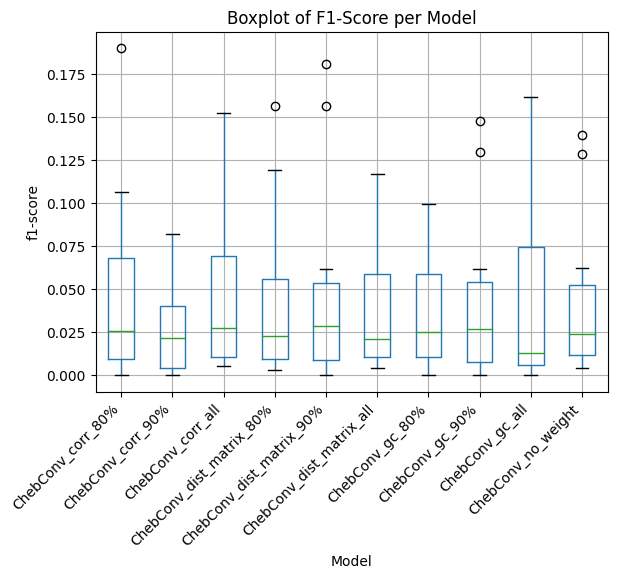

In [ ]:
plt.figure(figsize=(24, 12))
unbalanced_df.boxplot(column='f1-score', by='model')
plt.title('Boxplot of F1-Score per Model')
plt.suptitle('')  # Supprime le titre automatique de Pandas
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.ylabel('f1-score')
plt.savefig(path_data+'f1_score_boxplot_ChebConv_models.png')

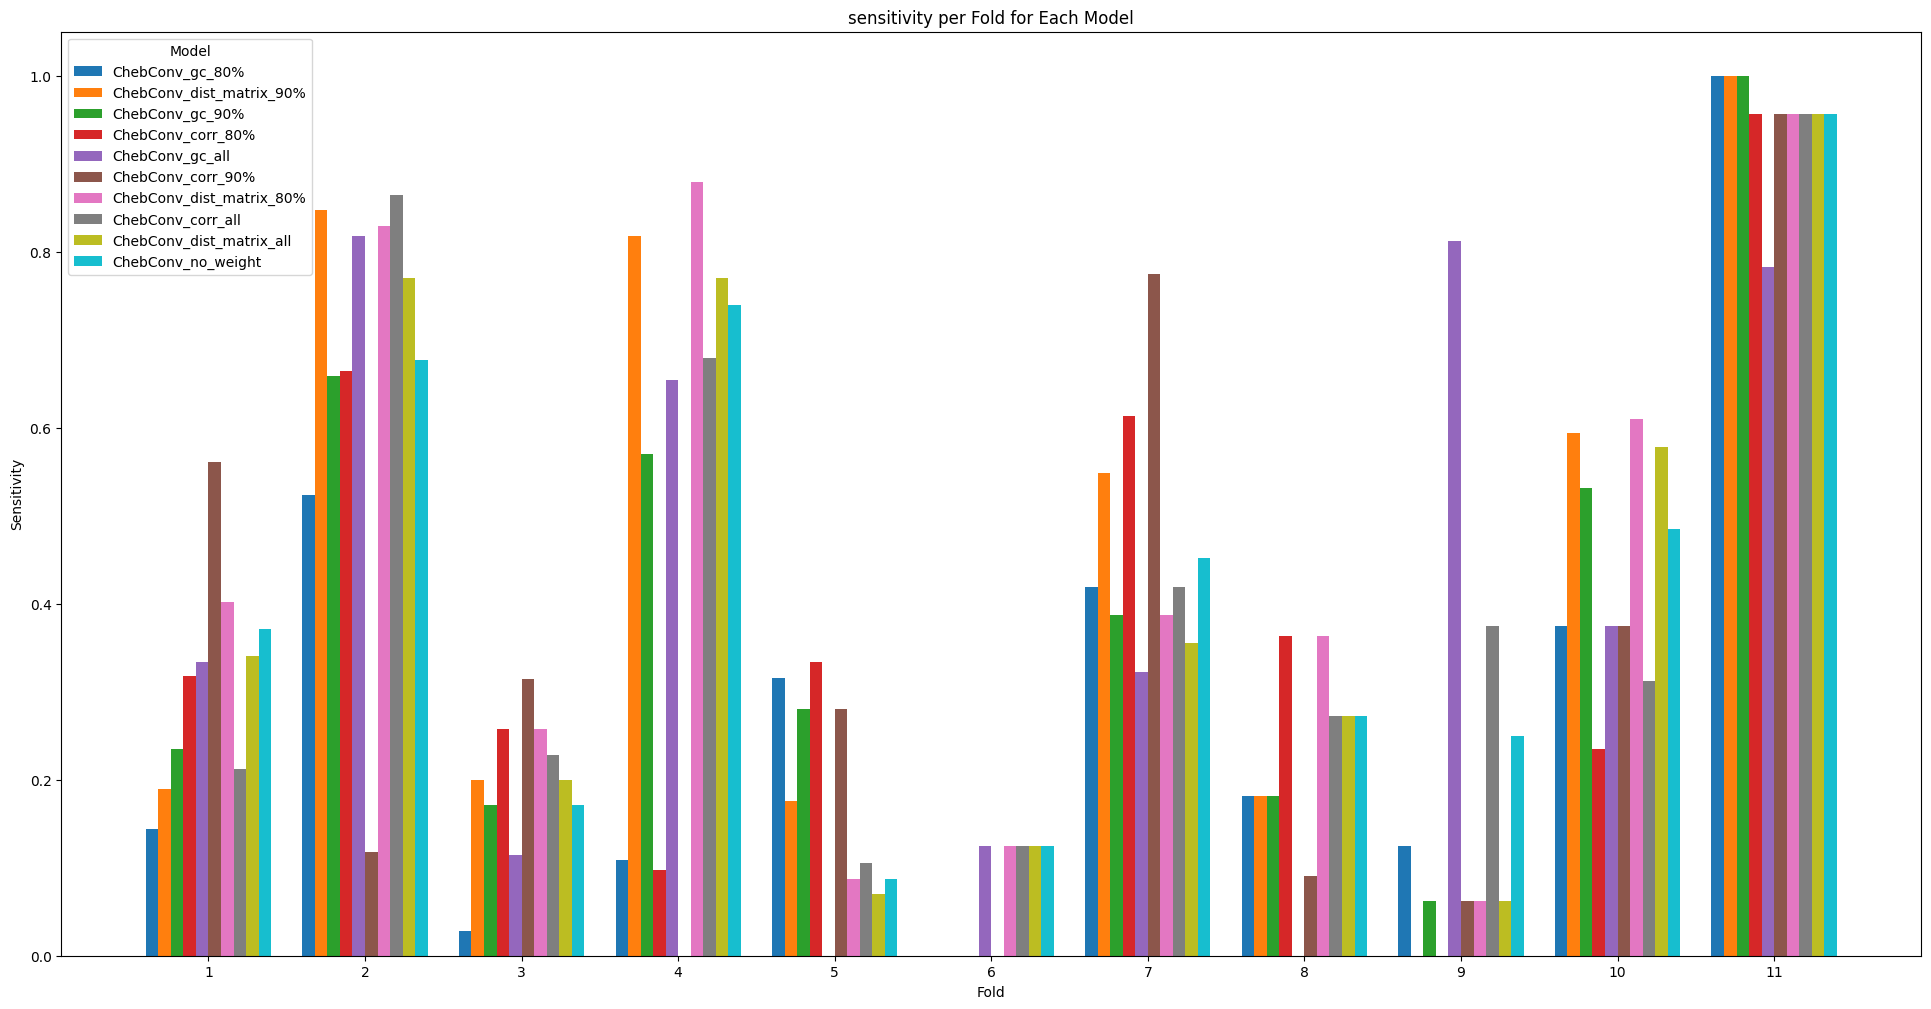

In [13]:
plt.figure(figsize=(24, 12))

for i, model in enumerate(models):
    model_data = unbalanced_df[unbalanced_df['model'] == model]
    plt.bar(bar_positions + i * bar_width, model_data['sensitivity'], bar_width, label=model)

plt.xlabel('Fold')
plt.ylabel('Sensitivity')
plt.title('sensitivity per Fold for Each Model')
plt.xticks(bar_positions + bar_width * (len(models) - 1) / 2, folds)
plt.legend(title='Model')
plt.savefig(path_data+'sensitivity_per_fold_ChebConv_models.png')

<Figure size 2400x1200 with 0 Axes>

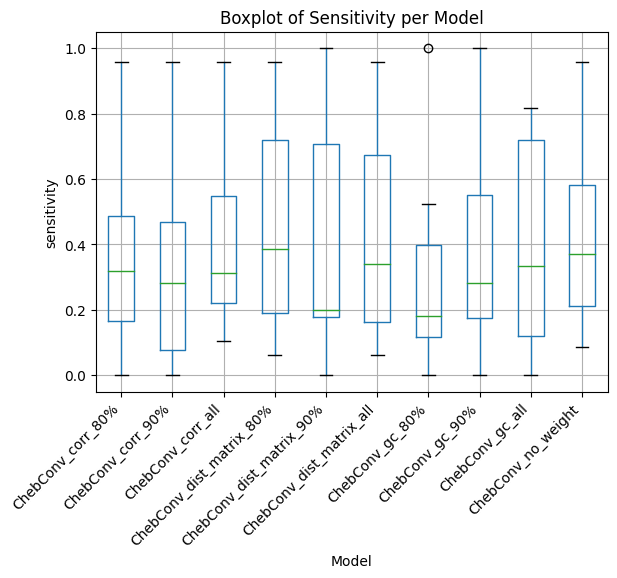

In [14]:
plt.figure(figsize=(24, 12))
unbalanced_df.boxplot(column='sensitivity', by='model')
plt.title('Boxplot of Sensitivity per Model')
plt.suptitle('')  # Supprime le titre automatique de Pandas
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.ylabel('sensitivity')
plt.savefig(path_data+'sensitivity_boxplot_ChebConv_models.png')

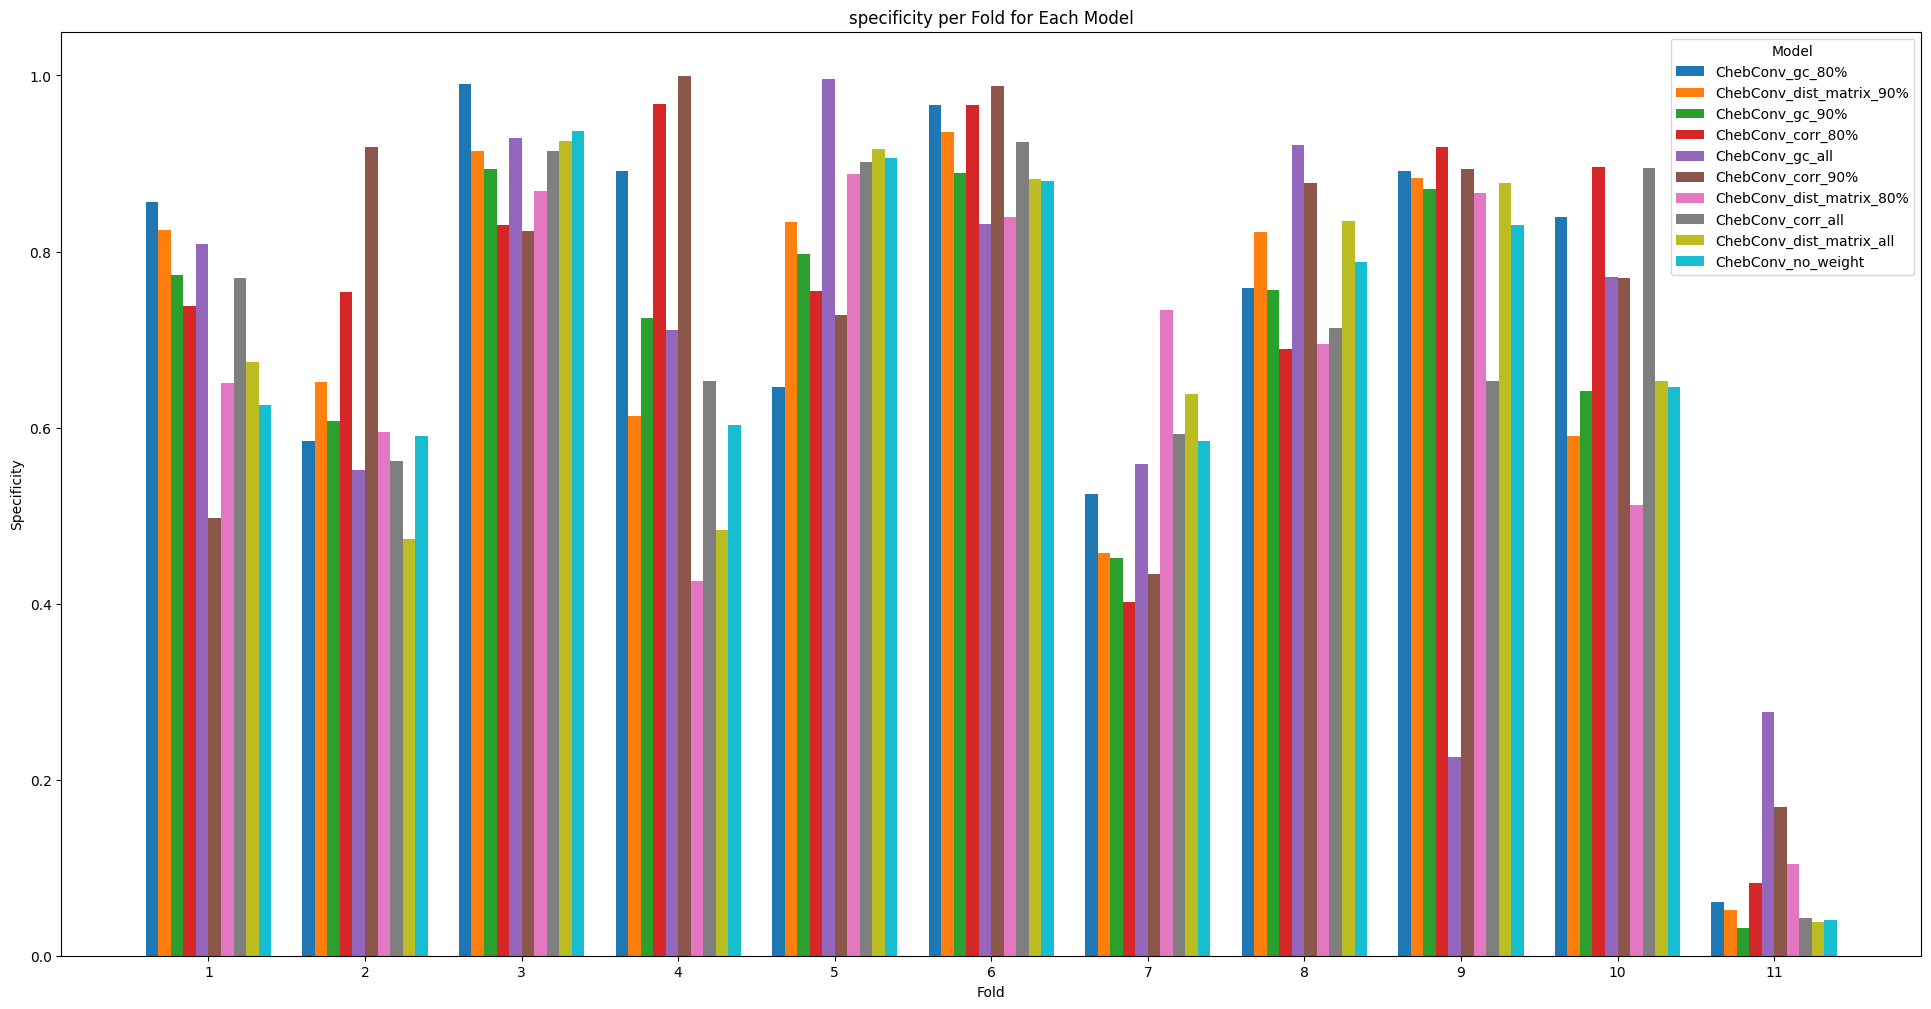

In [15]:
plt.figure(figsize=(24, 12))

for i, model in enumerate(models):
    model_data = unbalanced_df[unbalanced_df['model'] == model]
    plt.bar(bar_positions + i * bar_width, model_data['specificity'], bar_width, label=model)

plt.xlabel('Fold')
plt.ylabel('Specificity')
plt.title('specificity per Fold for Each Model')
plt.xticks(bar_positions + bar_width * (len(models) - 1) / 2, folds)
plt.legend(title='Model')
plt.savefig(path_data+'specificity_per_fold_ChebConv_models.png')

<Figure size 2400x1200 with 0 Axes>

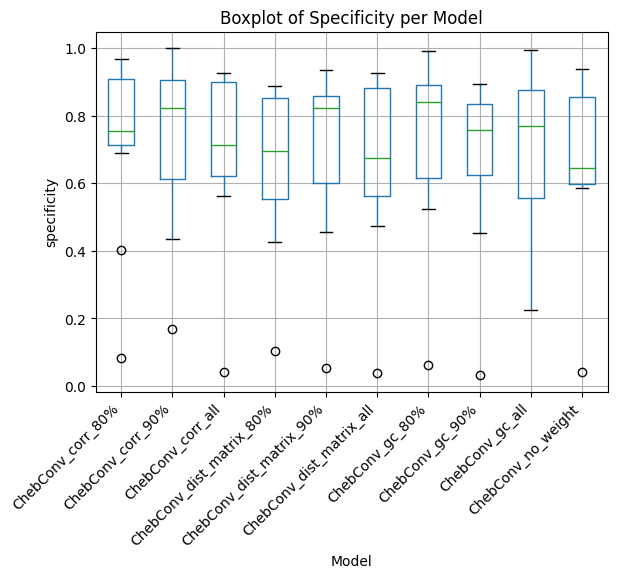

In [16]:
plt.figure(figsize=(24, 12))
unbalanced_df.boxplot(column='specificity', by='model')
plt.title('Boxplot of Specificity per Model')
plt.suptitle('')  # Supprime le titre automatique de Pandas
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.ylabel('specificity')
plt.savefig(path_data+'specificity_boxplot_ChebConv_models.png')